In [10]:
#install.packages("ggplot2")
#install.packages("ggfortify")
#install.packages("clusterSim")
#install.packages("clValid")
#install.packages("pdfCluster")

In [11]:
library(ggplot2) #data visualization
library(ggfortify) #data visualization
library(clusterSim)
library(clValid)
library(pdfCluster)
library(cluster)

In [12]:
reseach_clustering<- function(dataset,title,cluster_plot_index){
    RAND = list()
    
    DB_PAM = list() 
    DUNN_PAM = list()
    
    DB_KM = list() 
    DUNN_KM = list()
    
    for (i in c(2:15)){
        KM <- kmeans(dataset, i)
        PAM <- pam(dataset,i)
        if (i==cluster_plot_index){
            KM_plot <- autoplot(KM,dataset, frame=TRUE, title="K-means")
            PAM_plot <-autoplot(PAM,dataset, frame=TRUE, title="PAM")
            plot_1 = KM_plot + ggtitle(paste(title,'K-Means'))
            plot_2 = PAM_plot +ggtitle(paste(title,'PAM'))
        }
        d<-dist(dataset)
        DB_PAM[i-1] = index.DB(dataset,PAM$clustering,d, centrotypes="medoids")$DB
        DB_KM[i-1] = index.DB(dataset,KM$cluster,d, centrotypes="centroids")$DB
        DUNN_KM[i-1] = dunn(Data=dataset,clusters=KM$cluster)
        DUNN_PAM[i-1] = dunn(Data=dataset,clusters=PAM$clustering)
        RAND[i-1] = adj.rand.index(PAM$clustering, KM$cluster)
    }
    return (list(plot_1,plot_2,RAND,DB_PAM,DUNN_PAM,DB_KM,DUNN_KM))
}
plot_pam <- function(research_res,title){
    RAND = matrix(unlist(research_res[3]))
    DB_PAM = matrix(unlist(research_res[4]))
    DUNN_PAM = matrix(unlist(research_res[5]))
    plot_data = cbind(RAND,DB_PAM)
    plot_data = cbind(plot_data,DUNN_PAM)
    matplot(plot_data, type = c("b"),pch=1,col = 1:4) #plot
    legend("topleft", legend = c('RAND','DUNN','DBI'), col=1:4, pch=1,title=(paste(title,'PAM'))) # optional legend
}
plot_kmeans <- function(research_res,title){
    RAND = matrix(unlist(research_res[3]))
    DB_PAM = matrix(unlist(research_res[6]))
    DUNN_PAM = matrix(unlist(research_res[7]))
    plot_data = cbind(RAND,DB_PAM)
    plot_data = cbind(plot_data,DUNN_PAM)
    matplot(plot_data, type = c("b"),pch=1,col = 1:4) #plot
    legend("topleft", legend = c('RAND','DUNN','DBI'), col=1:4, pch=1,title=(paste(title,'K-Means'))) # optional legend
}

[[1]]


[[1]]


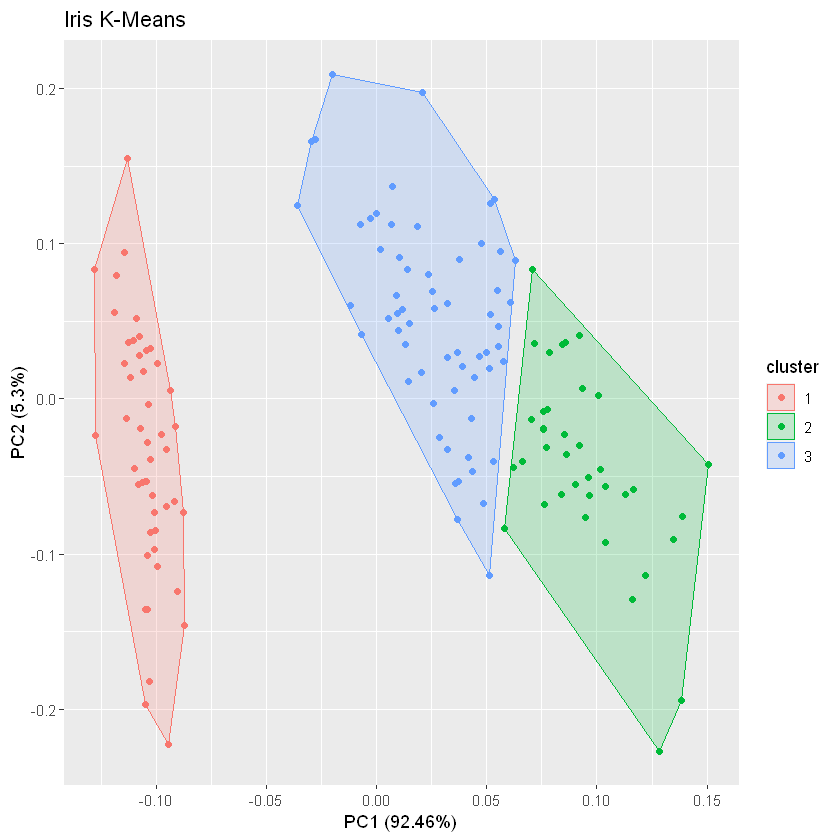

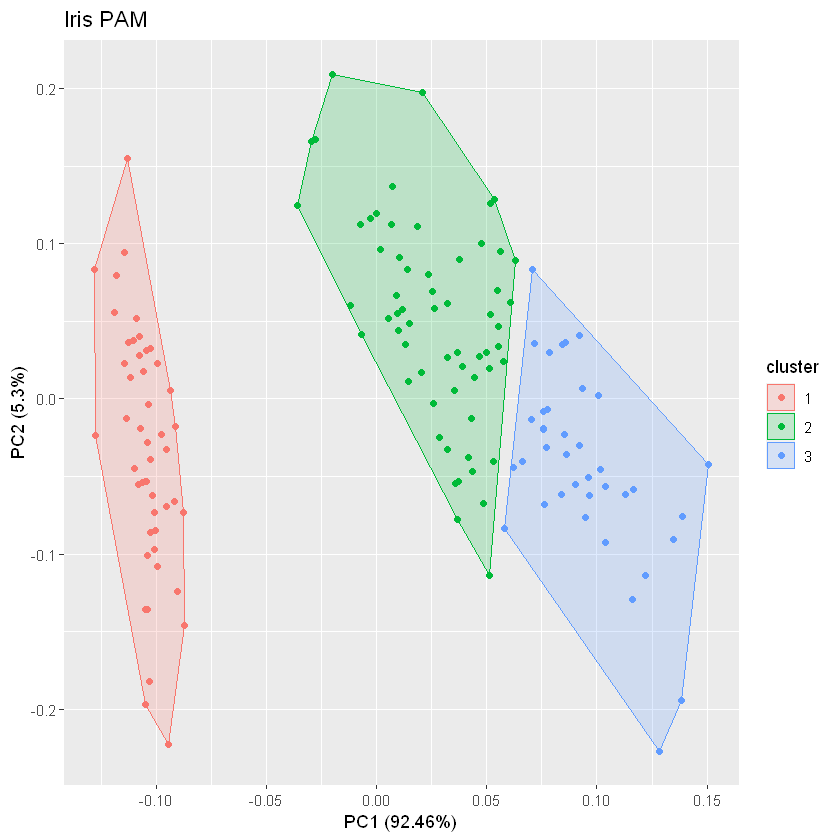

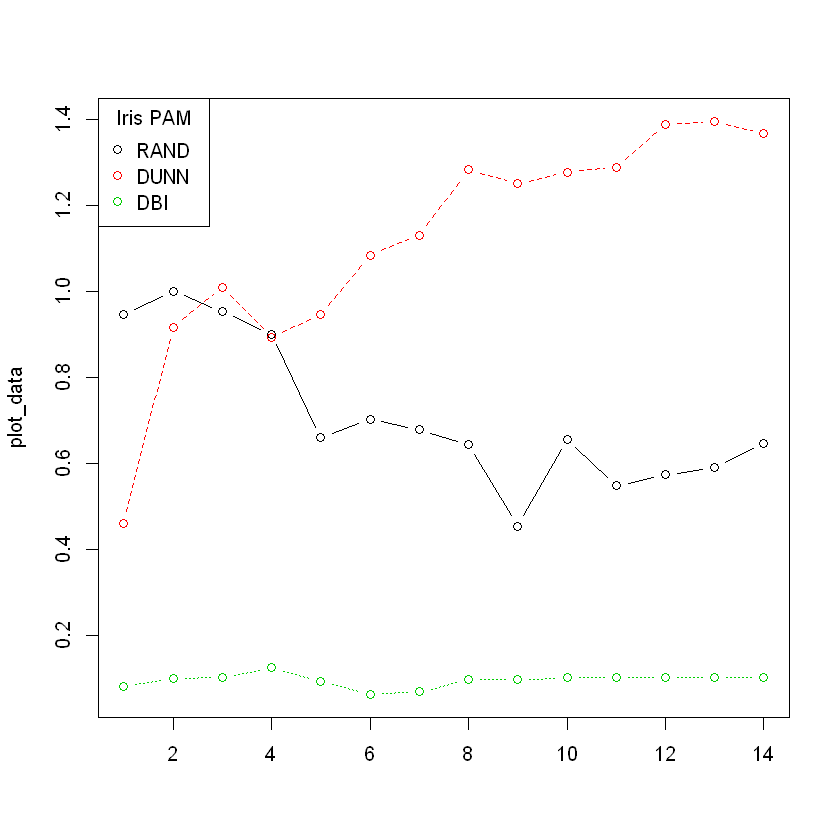

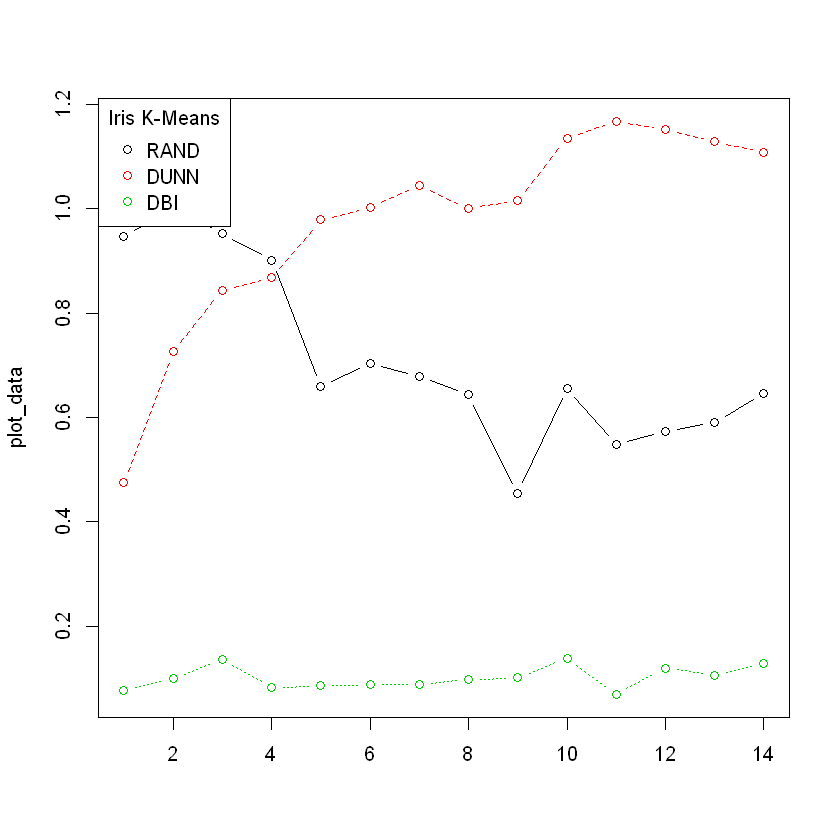

In [18]:
iris_data = read.csv(file = "iris.csv") #załaduj do iris_data dane Iris.
iris_data$features <- iris_data
iris_data$features$Species <- NULL
iris_data$features$Id <- NULL
dataset <- iris_data$features
res = reseach_clustering(dataset,"Iris",3)
res[1]
res[2]
plot_pam(res,'Iris')
plot_kmeans(res,'Iris')

Warning message:
"did not converge in 10 iterations"


[[1]]


[[1]]


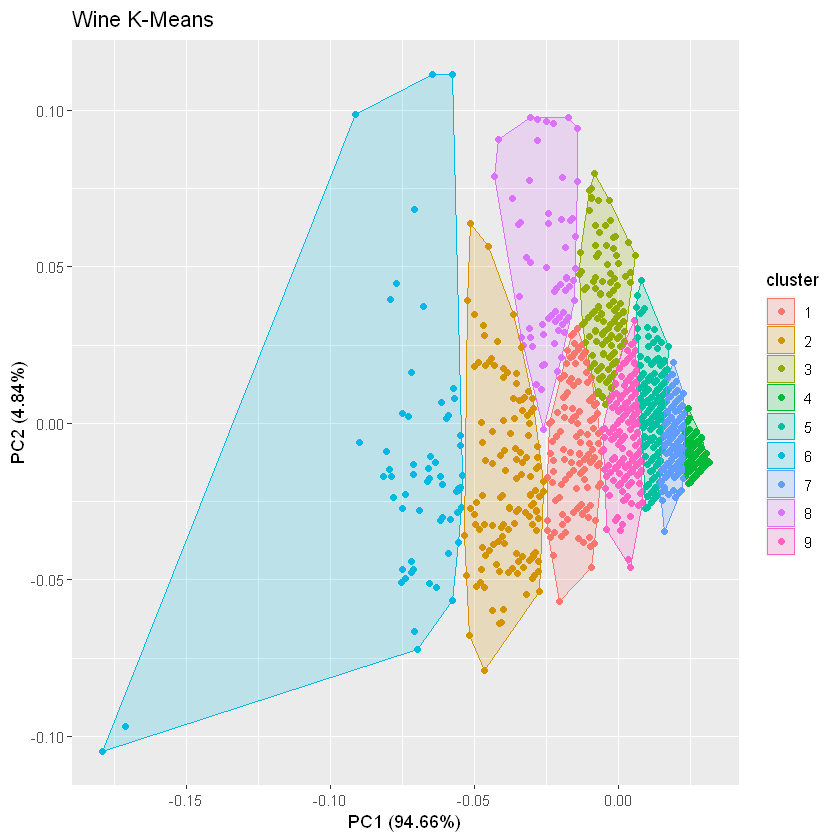

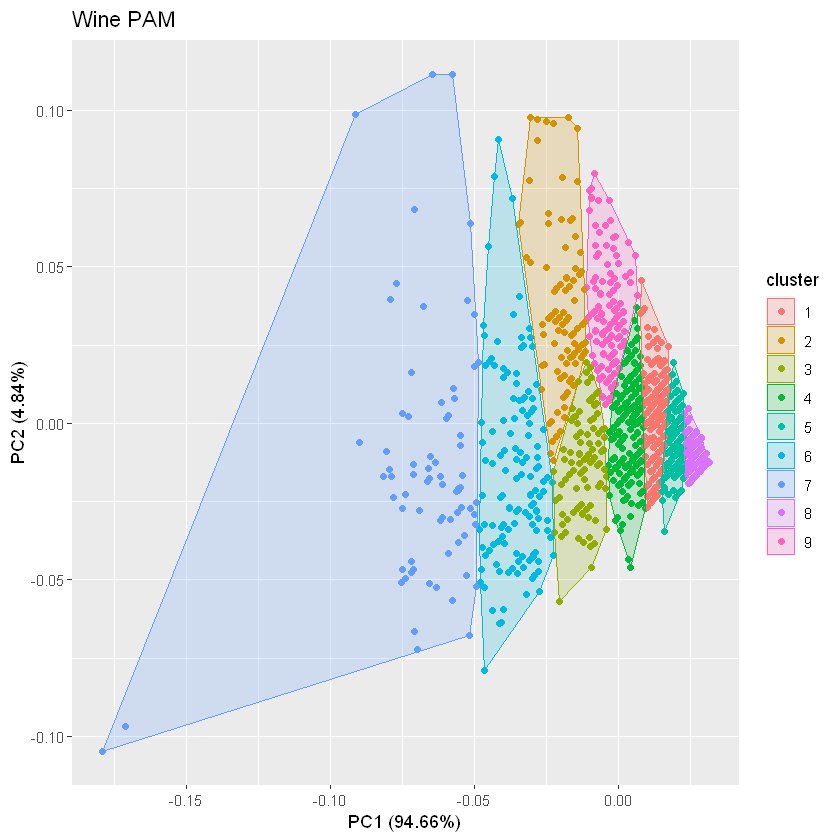

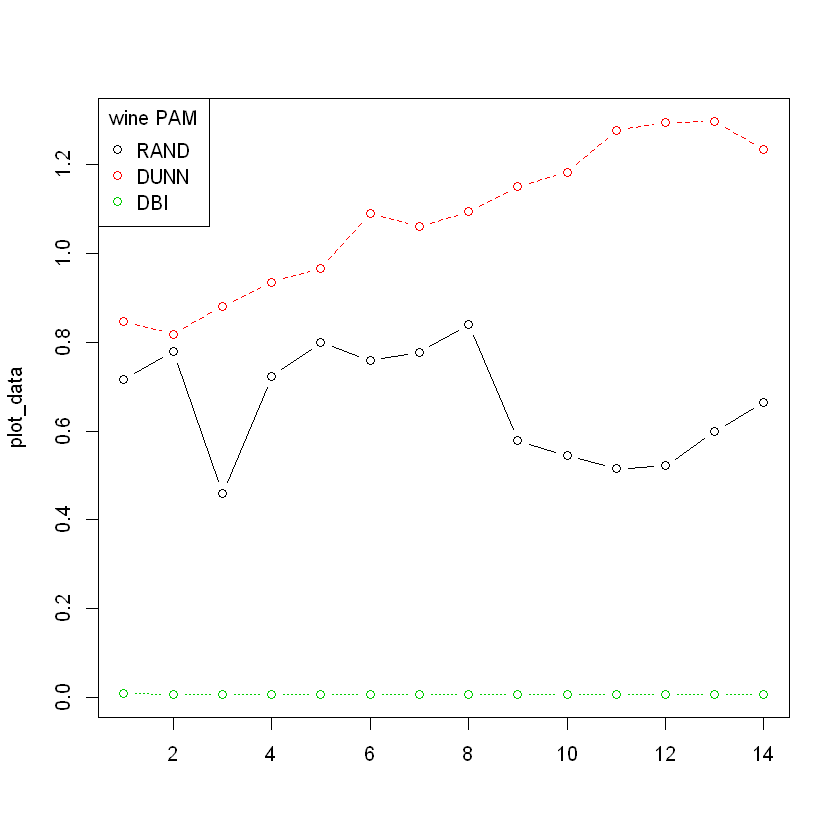

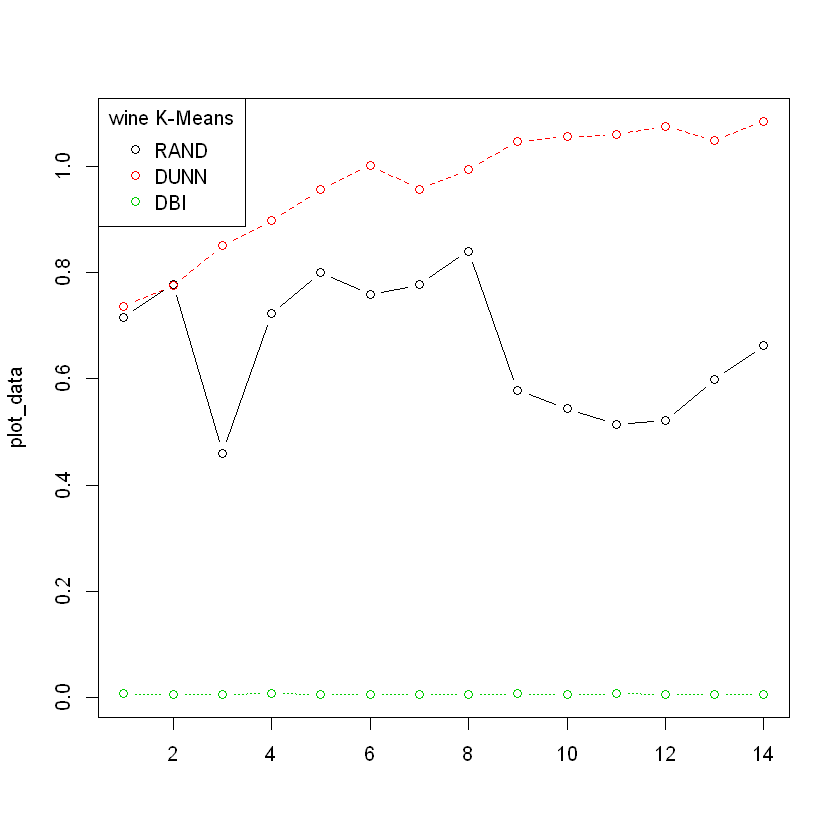

In [14]:
wine_data = read.csv(file = "wine.csv") #załaduj do wine_data dane Wine Quality
wine_data$features <- wine_data
wine_data$features$quality <- NULL
dataset <- wine_data$features
res = reseach_clustering(dataset,"Wine",9)
res[1]
res[2]
plot_pam(res,'wine')
plot_kmeans(res,'wine')

[[1]]


[[1]]


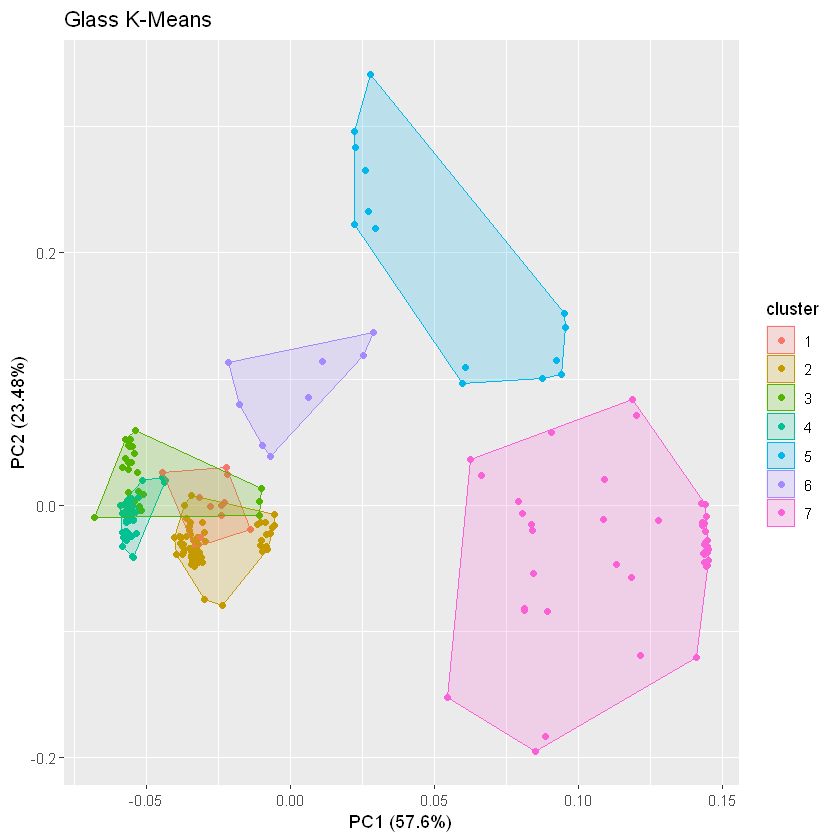

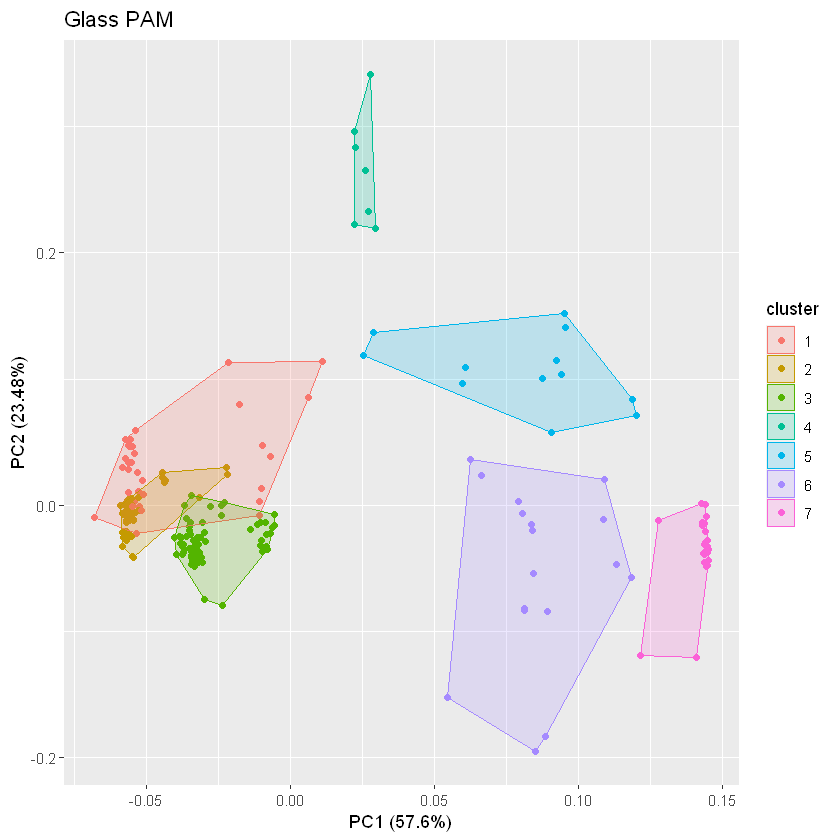

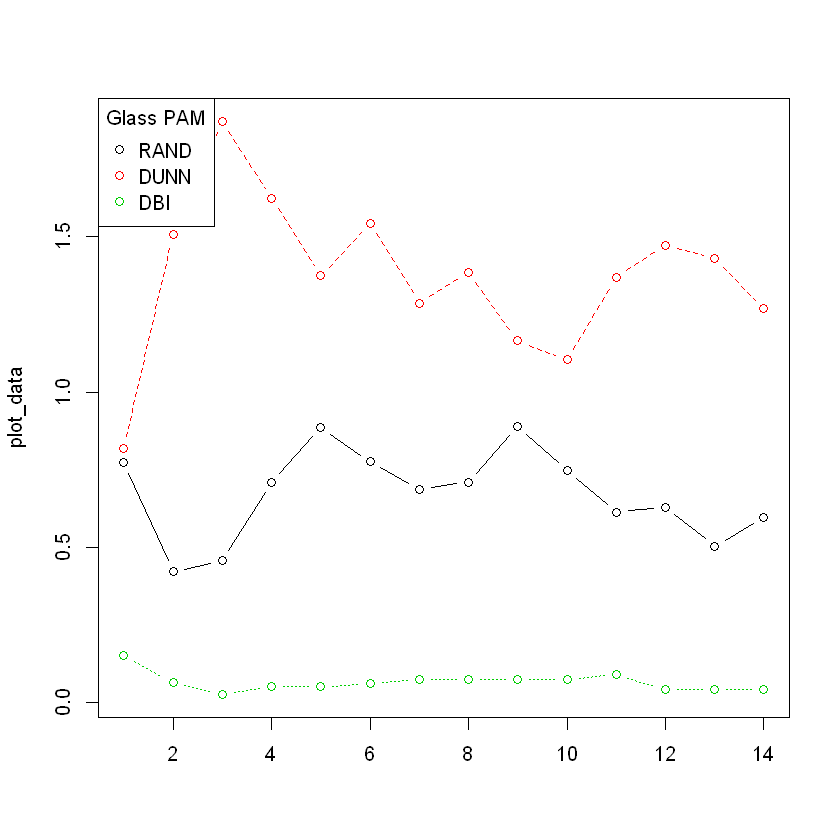

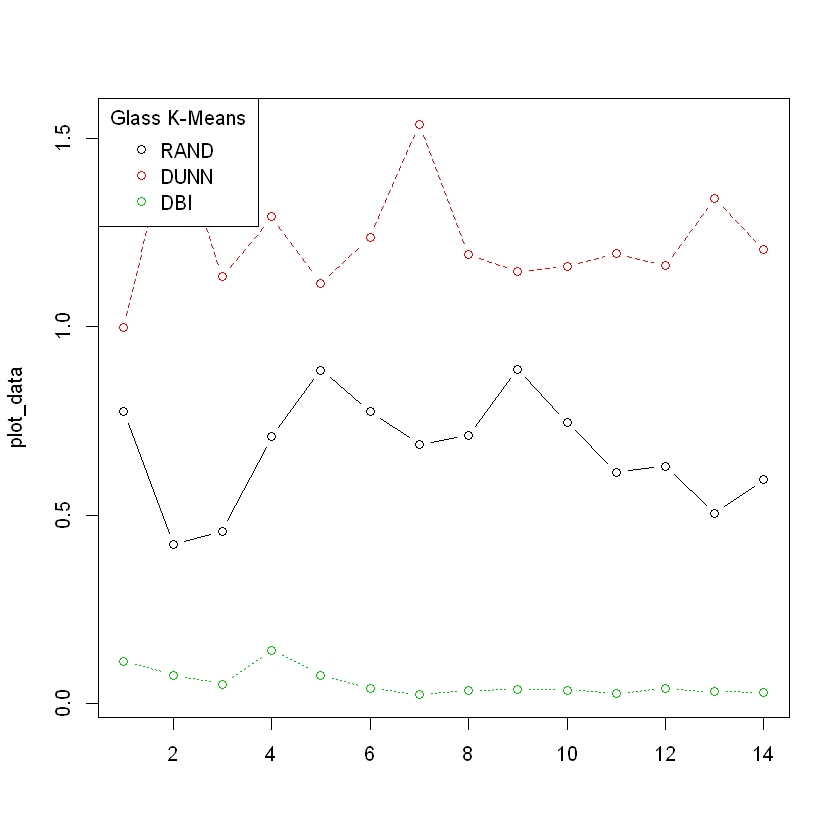

In [15]:
glass_data = read.csv(file = "glass.csv") #załąduj do glass_data dane Glass
glass_data$features <- glass_data
glass_data$features$quality <- NULL
dataset <- glass_data$features
res = reseach_clustering(dataset,"Glass",7)
res[1]
res[2]
plot_pam(res,'Glass')
plot_kmeans(res,'Glass')

[[1]]


[[1]]


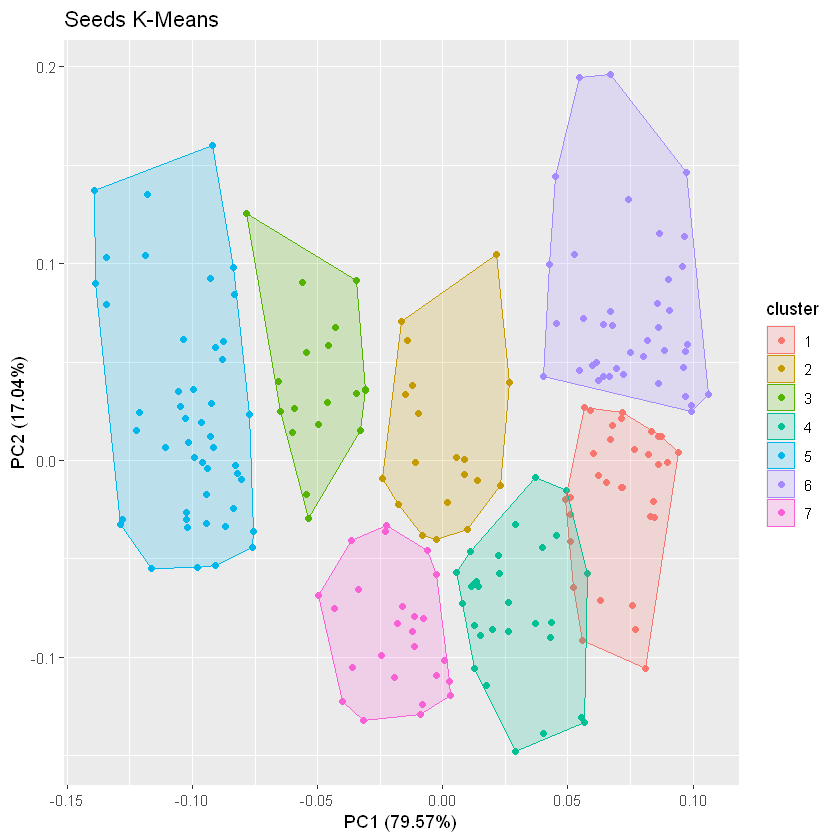

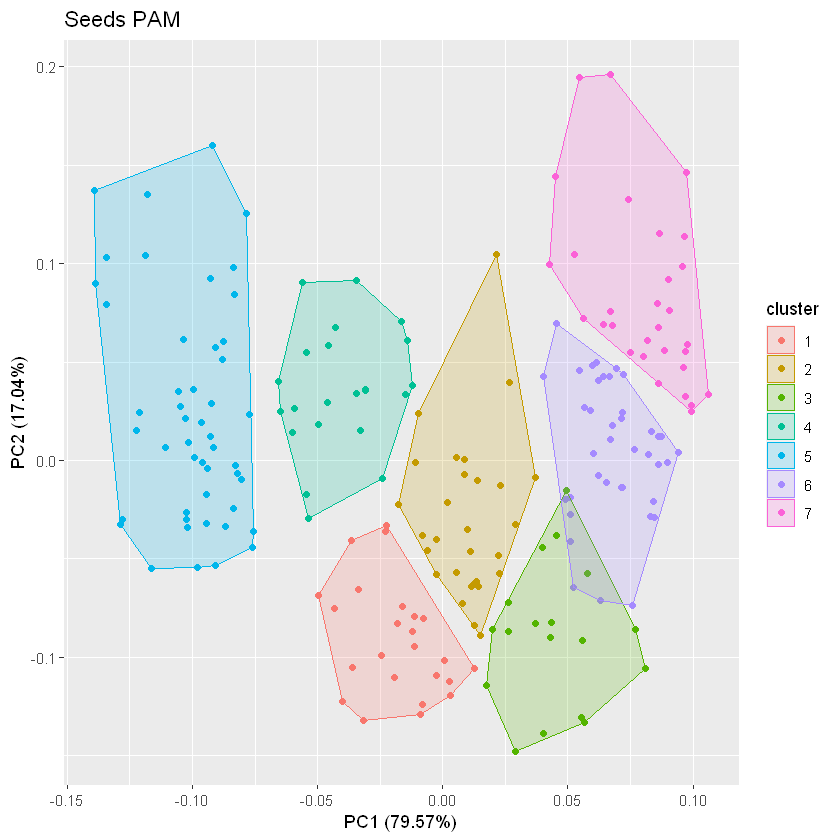

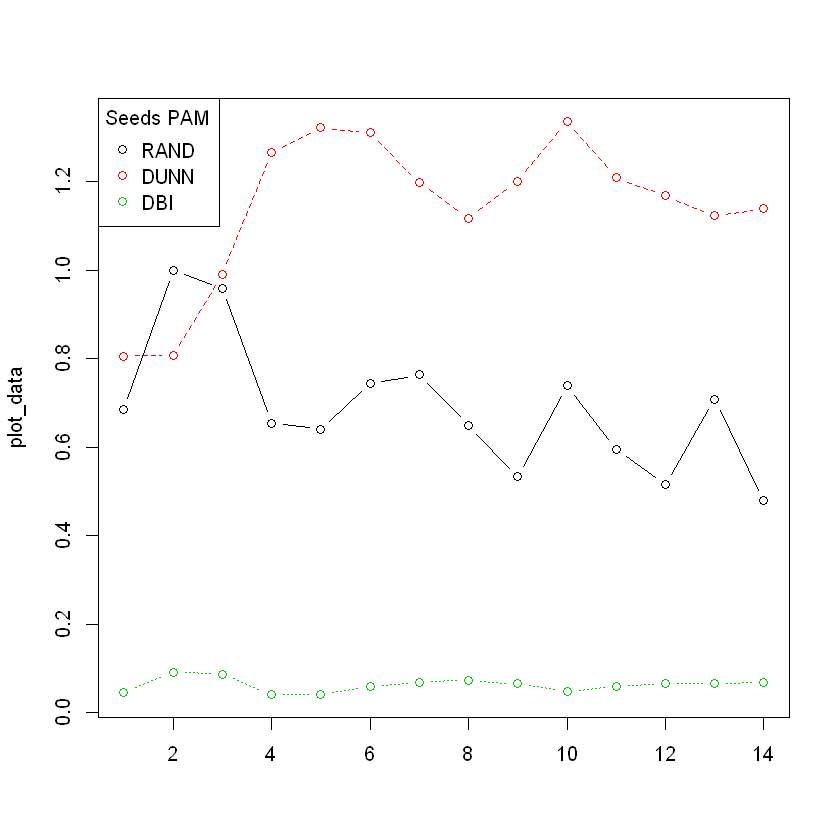

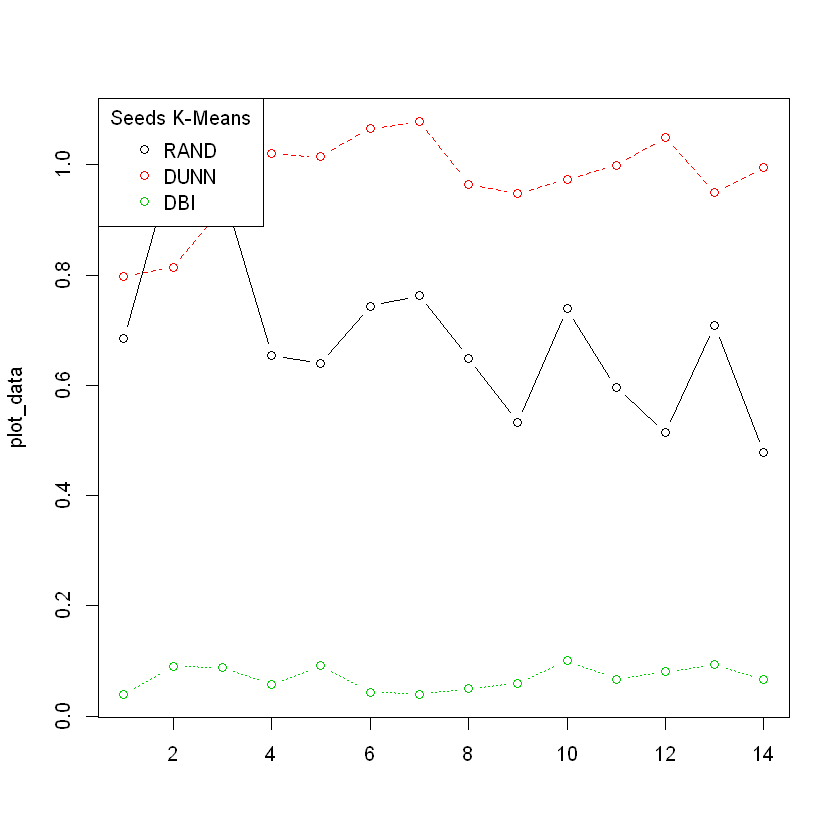

In [16]:
seed_data = read.csv(file = "seeds.csv") #załaduj do seed_data dane Seeds
seed_data$features <- seed_data
seed_data$features$quality <- NULL
dataset <- seed_data$features
res = reseach_clustering(dataset,"Seeds",7)
res[1]
res[2]
plot_pam(res,'Seeds')
plot_kmeans(res,'Seeds')